In [1]:
import random
import numpy as np
import time
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Sample static data
sections = [
    {'id': 1, 'code': 'Section A'},
    {'id': 2, 'code': 'Section B'}
]

subjects = [
    {'id': 1, 'title': 'Math', 'units': 3},
    {'id': 2, 'title': 'English', 'units': 2},
    {'id': 3, 'title': 'Science', 'units': 2},
]

teachers = [
    {'id': 1, 'name': 'Mr. Smith', 'expertise': ['Math', 'Science']},
    {'id': 2, 'name': 'Ms. Johnson', 'expertise': ['English']},
    {'id': 3, 'name': 'Dr. Allen', 'expertise': ['Math', 'English', 'Science']},
]


In [3]:
class StaticAntColonyScheduler:
    def __init__(self, sections, subjects, teachers, days=5, slots=5, iterations=50, ants=10):
        self.sections = sections
        self.subjects = subjects
        self.teachers = teachers
        self.days = days
        self.slots = slots
        self.iterations = iterations
        self.ants = ants
        self.best_schedule = None
        self.best_fitness = float('inf')

    def generate_possible_assignments(self):
        assignments = []
        for section in self.sections:
            for subject in self.subjects:
                for teacher in self.teachers:
                    if subject['title'] in teacher['expertise']:
                        for day in range(self.days):
                            for slot in range(self.slots):
                                assignments.append({
                                    'section_id': section['id'],
                                    'subject_id': subject['id'],
                                    'teacher_id': teacher['id'],
                                    'day': day,
                                    'time_slot': slot,
                                    'units': subject['units']
                                })
        return assignments

    def evaluate_schedule(self, schedule):
        teacher_times = set()
        section_times = set()
        teacher_load = defaultdict(int)

        for s in schedule:
            t_key = (s['teacher_id'], s['day'], s['time_slot'])
            sec_key = (s['section_id'], s['day'], s['time_slot'])

            teacher_times.add(t_key)
            section_times.add(sec_key)
            teacher_load[s['teacher_id']] += 1

        teacher_conflicts = len(schedule) - len(teacher_times)
        section_conflicts = len(schedule) - len(section_times)
        load_values = list(teacher_load.values())
        load_variance = np.var(load_values)

        return teacher_conflicts, section_conflicts, load_variance

    def run(self):
        all_assignments = self.generate_possible_assignments()
        start_time = time.time()

        for _ in range(self.iterations):
            for _ in range(self.ants):
                schedule = random.sample(all_assignments, k=min(len(all_assignments), 15))
                t_conf, s_conf, var = self.evaluate_schedule(schedule)

                fitness = t_conf + s_conf + var
                if fitness < self.best_fitness:
                    self.best_schedule = schedule
                    self.best_fitness = fitness
                    self.metrics = {
                        'teacher_conflicts': t_conf,
                        'section_conflicts': s_conf,
                        'load_variance': var
                    }

        return self.best_schedule, self.metrics, time.time() - start_time


In [4]:
scheduler = StaticAntColonyScheduler(sections, subjects, teachers)
schedule, metrics, exec_time = scheduler.run()

print(f"Generated Schedule Size: {len(schedule)}")
print(f"Execution Time: {exec_time:.2f} seconds")
print("Optimization Metrics:", metrics)


Generated Schedule Size: 15
Execution Time: 0.07 seconds
Optimization Metrics: {'teacher_conflicts': 0, 'section_conflicts': 0, 'load_variance': np.float64(0.6666666666666666)}


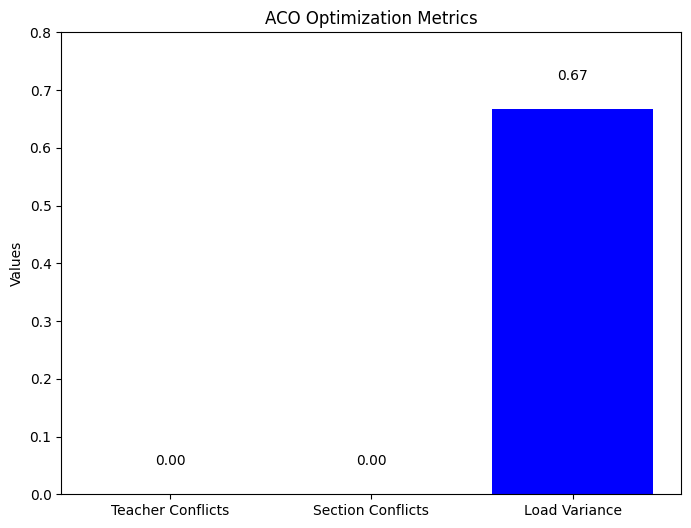

In [5]:
labels = ['Teacher Conflicts', 'Section Conflicts', 'Load Variance']
values = [
    metrics['teacher_conflicts'],
    metrics['section_conflicts'],
    metrics['load_variance']
]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['red', 'orange', 'blue'])
plt.title('ACO Optimization Metrics')
plt.ylabel('Values')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, f'{yval:.2f}', ha='center')

plt.ylim(0, max(values) * 1.2)
plt.show()


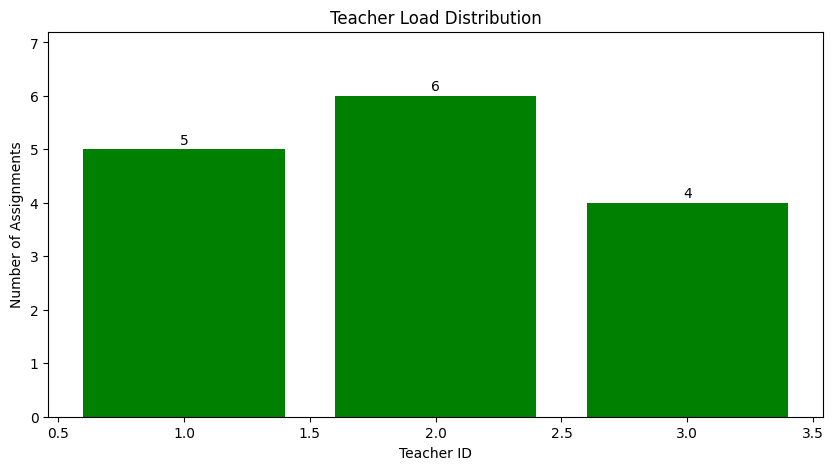

In [6]:
teacher_loads = defaultdict(int)
for entry in schedule:
    teacher_loads[entry['teacher_id']] += 1

teacher_ids = list(teacher_loads.keys())
loads = list(teacher_loads.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(teacher_ids, loads, color='green')
plt.title('Teacher Load Distribution')
plt.xlabel('Teacher ID')
plt.ylabel('Number of Assignments')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, f'{int(yval)}', ha='center')

plt.ylim(0, max(loads) * 1.2)
plt.show()


In [7]:
import pandas as pd

df_schedule = pd.DataFrame(schedule)
df_schedule.sort_values(by=['day', 'time_slot'], inplace=True)
df_schedule.head(15)


,section_id,subject_id,teacher_id,day,time_slot,units
12,2,2,2,0,2,2
6,2,3,1,0,3,2
3,2,1,1,1,0,3
10,1,2,2,1,2,2
11,2,1,1,1,2,3
9,2,2,3,1,4,2
8,2,2,2,2,1,2
5,1,3,1,3,0,2
1,2,3,3,3,1,2
14,1,2,2,3,1,2
